In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
e_com = pd.read_excel("C:\\Users\\Shivam.Arora7\\Desktop\\DataSets\\Ecomeerce\\data.xlsx")

In [4]:
e_com.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
e_com.isnull().sum()/len(e_com) * 100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

What was the best month for sales? How much was the total price?

Augment: We don't have a month column yet nor a a total price column

In [6]:
e_com['totalPrice'] = e_com['Quantity']*e_com['UnitPrice']

In [7]:
e_com['month'] = e_com.InvoiceDate.dt.month

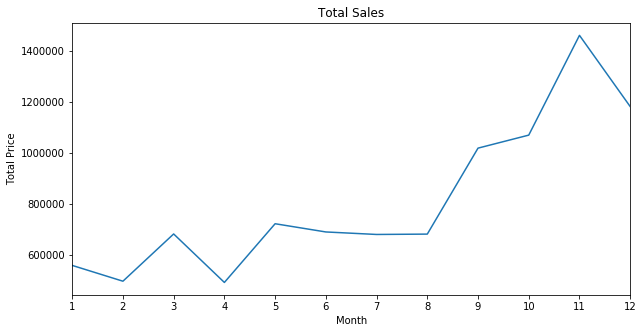

In [8]:
plt.figure(figsize=(10,5))
e_com.groupby(e_com.month).sum()['totalPrice'].plot()
plt.title("Total Sales")
plt.ylabel("Total Price")
plt.xlabel("Month")
plt.xticks(list(range(1,13)))
plt.show()

Hence, the best month was november with total sales as:

In [9]:
max(e_com.groupby(e_com.month).sum()['totalPrice'])

1461756.2499997574

Which country sold the most products?

In [10]:
e_com.Country.value_counts().head()

United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Name: Country, dtype: int64

Since our data contains most orders from United Kingdom it is the best country however, let's check for instead:

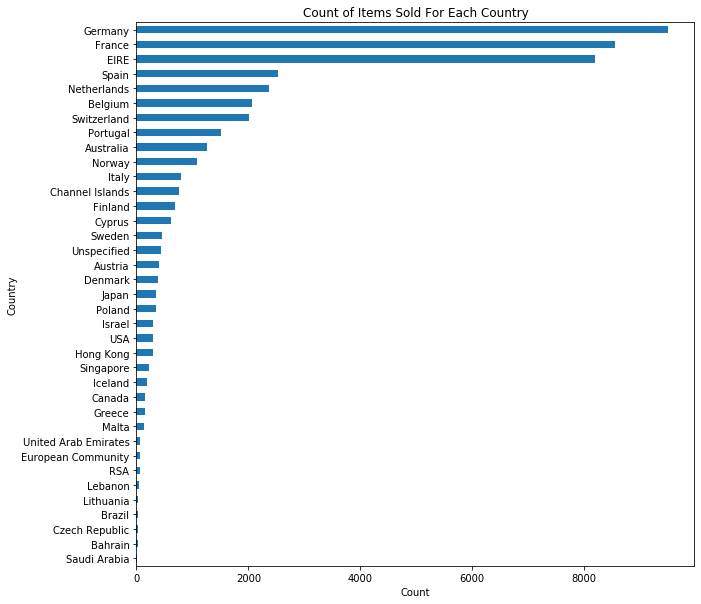

In [11]:
plt.figure(figsize=(10,10))
e_com_per_country = e_com.groupby(e_com.Country).count()
e_com_per_country[e_com_per_country.index!='United Kingdom'].sort_values('InvoiceNo')['InvoiceNo'].plot(kind='barh')
plt.title("Count of Items Sold For Each Country")
plt.ylabel("Country")
plt.xlabel("Count")
plt.show()

United Kingdom sold the most products which are:

In [12]:
max(e_com.groupby(e_com.Country).count()['InvoiceNo'])

495478

What time should we display advertisements to maximize likelihood of customer's buying product?

We dont have an hour column! AUGMENT!

In [13]:
e_com['hour'] = e_com.InvoiceDate.dt.hour

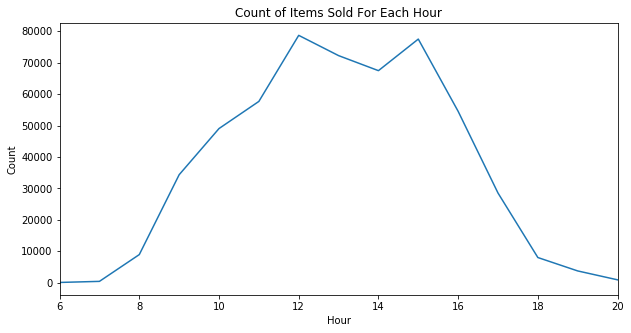

In [14]:
plt.figure(figsize=(10,5))
e_com.groupby(e_com.hour).count()['InvoiceNo'].plot()
plt.title("Count of Items Sold For Each Hour")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.show()

best time - 10 or 11 am 

What products are most often sold together?

We need to look for this in the line items which have duplicates in their invoice no..

In [15]:
df = e_com[e_com.InvoiceNo.duplicated(keep=False)] #keep=False is to have all the duplicates

We need to combine the rows for description for each invoice ID..

In [16]:
df[df.InvoiceNo==536365] 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,totalPrice,month,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,8
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,12,8
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,12,8


In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
df['Grouped'] = df.groupby("InvoiceNo").Description.transform(lambda x: ','.join(x))

In [19]:
df = df[['InvoiceNo','Grouped']].drop_duplicates()

In [20]:
df[df.InvoiceNo==536365]

,InvoiceNo,Grouped
0,536365,"WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL..."


In [21]:
from itertools import combinations
from collections import Counter

count = Counter()

In [22]:
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('KEY FOB ', 'KEY FOB ') 809
('GREEN REGENCY TEACUP AND SAUCER', 'PINK REGENCY TEACUP AND SAUCER') 618
('KEY FOB ', ' BACK DOOR ') 590
('KEY FOB ', ' SHED') 554
('JUMBO BAG PINK POLKADOT', 'JUMBO BAG RED RETROSPOT') 544
('GREEN REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER ') 534
('KEY FOB ', ' FRONT  DOOR ') 481
('JUMBO SHOPPER VINTAGE RED PAISLEY', 'JUMBO BAG RED RETROSPOT') 467
('JUMBO BAG RED RETROSPOT', 'DOTCOM POSTAGE') 461
('COFFEE', 'SUGAR') 461


What product sold the most? Why do you think it sold the most?

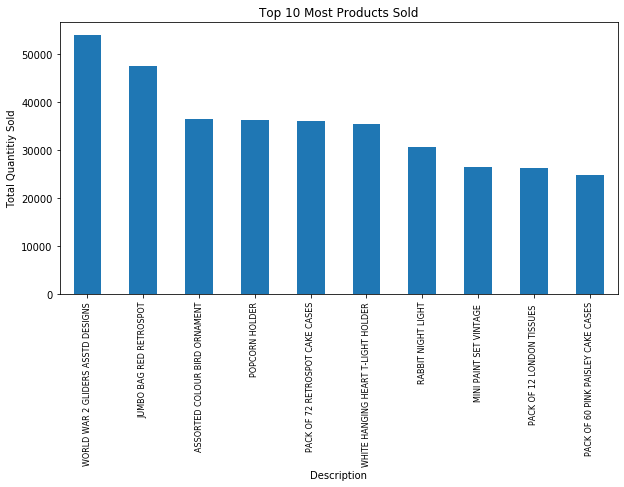

In [23]:
plt.figure(figsize=(10,5))
best_products = e_com.groupby(e_com.Description).sum().sort_values('Quantity',ascending=False)[:10][e_com.groupby(e_com.Description).sum().Quantity > 0]
best_products['Quantity'].plot(kind='bar')
plt.title("Top 10 Most Products Sold")
plt.ylabel("Total Quantitiy Sold")
plt.xticks(size=8)
plt.show()

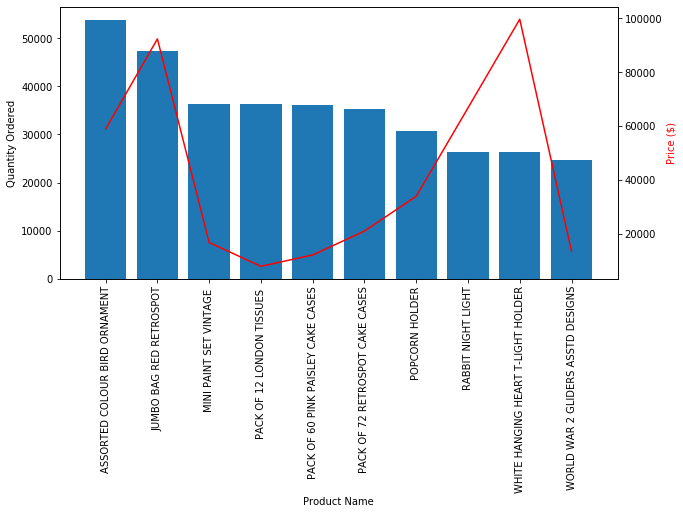

In [24]:
prices = best_products.groupby("Description").mean()['totalPrice']
keys = [key for key, df in best_products.groupby("Description")]

fig, ax1 = plt.subplots(figsize=(10,5))

ax2 = ax1.twinx()
ax1.bar(keys, best_products['Quantity'])
ax2.plot(keys, prices,color='red')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered')
ax2.set_ylabel('Price ($)',color='red')
ax1.set_xticklabels(keys,rotation=90,size=10)

fig.show()

What kind of purchases are most often occured?

since the data contains rows for each item in a order..

In [25]:
invoice_df = e_com.groupby(e_com.InvoiceNo).sum()

In [26]:
invoice_df.drop(['month','hour','Quantity','UnitPrice'],axis=1,inplace=True)

In [27]:
invoice_df.head()

,CustomerID,totalPrice
InvoiceNo,,
536365,124950.0,139.12
536366,35700.0,22.20
536367,156564.0,278.73
536368,52188.0,70.05
536369,13047.0,17.85


In [28]:
price_ranges = (((invoice_df.totalPrice.quantile(0),invoice_df.totalPrice.quantile(.25)),
                (invoice_df.totalPrice.quantile(.25),invoice_df.totalPrice.quantile(.5)),
                (invoice_df.totalPrice.quantile(.5),invoice_df.totalPrice.quantile(.75)),
                (invoice_df.totalPrice.quantile(.75),invoice_df.totalPrice.quantile(1))))

In [29]:
def categorize_price(total_price_value):
    if total_price_value in range(int(price_ranges[0][0]),int(price_ranges[0][1])):
        return "Very Low"
    elif total_price_value in range(int(price_ranges[1][0]),int(price_ranges[1][1])):
        return "Low"
    elif total_price_value in range(int(price_ranges[2][0]),int(price_ranges[2][1])):
        return "Medium"
    elif total_price_value in range(int(price_ranges[3][0]),int(price_ranges[3][1])):
        return "High"
    else:
        return None

In [30]:
invoice_df['priceCategory'] = invoice_df.totalPrice.apply(categorize_price)

In [31]:
invoice_df.priceCategory.value_counts()

Very Low    2456
Low          506
High         281
Medium       245
Name: priceCategory, dtype: int64

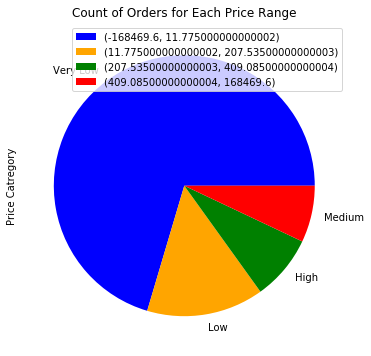

In [32]:
plt.figure(figsize=(15,6))
invoice_df.priceCategory.value_counts().plot(kind='pie',colors=['blue','orange','green','red'])
plt.title("Count of Orders for Each Price Range")
plt.ylabel("Price Catregory")
plt.legend(price_ranges)
plt.show()

Which customer is gold, platinum or silver customer?

##### RFM Analysis

Since there are nulls in Customer ID..

In [33]:
rfm_df = e_com.dropna()
rfm_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
totalPrice     0
month          0
hour           0
dtype: int64

###### Recency – How recently did the customer purchase?

###### Frequency – How often do they purchase?

###### Monetary Value – How much do they spend?

In [34]:
recency = rfm_df.groupby("CustomerID").max()['InvoiceDate']
recency = pd.DataFrame(recency)
recency.reset_index(inplace=True)
recency.columns = ['CustomerID','Last Purchase Date']
recency.head()

,CustomerID,Last Purchase Date
0,12346.0,2011-01-18 10:17:00
1,12347.0,2011-12-07 15:52:00
2,12348.0,2011-09-25 13:13:00
3,12349.0,2011-11-21 09:51:00
4,12350.0,2011-02-02 16:01:00


In [35]:
import datetime
now = max(recency['Last Purchase Date'])

In [36]:
recency['recency'] = recency['Last Purchase Date'].apply(lambda x: (now - x).days)
recency.drop(recency.columns[1],axis=1,inplace=True)
recency.head()

,CustomerID,recency
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [37]:
frequency = rfm_df.groupby(by=['CustomerID'],as_index=False).count()[['CustomerID','InvoiceNo']]
frequency.columns=['CustomerID','frequency']
frequency.head()

,CustomerID,frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [38]:
monetary = rfm_df.groupby(by=['CustomerID'],as_index=False).sum()[['CustomerID','totalPrice']]
monetary.columns=['CustomerID','monetary']
monetary.head()

,CustomerID,monetary
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [39]:
len(recency), len(frequency), len(monetary)

(4372, 4372, 4372)

In [40]:
rfm_df = pd.merge(pd.merge(recency,frequency,how='inner',on=['CustomerID']),monetary,how='inner',on=['CustomerID'])
rfm_df.head()

,CustomerID,recency,frequency,monetary
0,12346.0,325,2,0.00
1,12347.0,1,182,4310.00
2,12348.0,74,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,309,17,334.40


In [41]:
import seaborn as sns

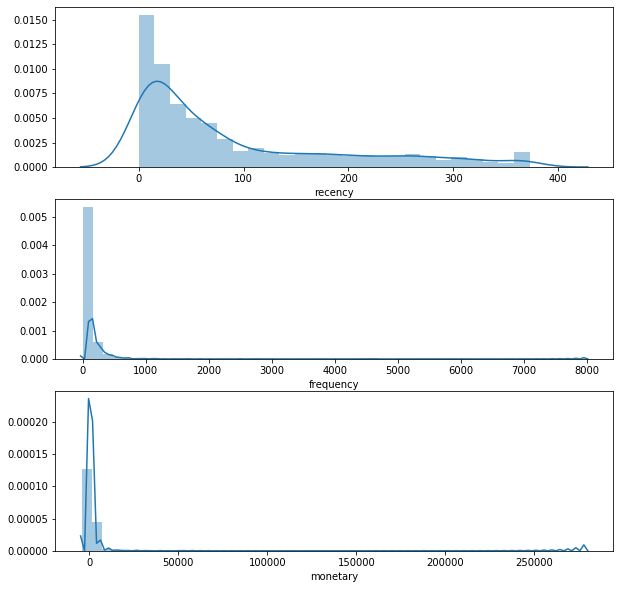

In [42]:
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
sns.distplot(rfm_df.recency)
plt.subplot(3,1,2)
sns.distplot(rfm_df.frequency)
plt.subplot(3,1,3)
sns.distplot(rfm_df.monetary)
plt.show()

In [71]:
from sklearn.cluster import KMeans

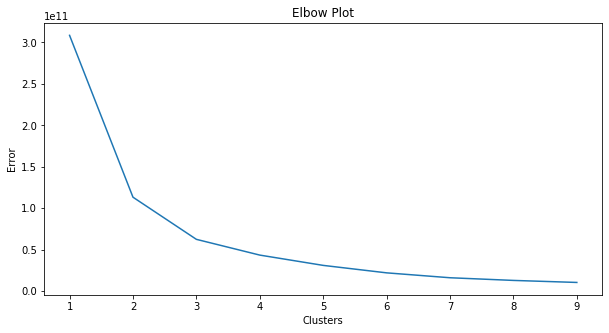

In [119]:
error = {}
for i in range(1,10):
    model = KMeans(n_clusters=i,random_state=42)
    model.fit(rfm_df)
    error[i] = model.inertia_

plt.figure(figsize=(10,5))
plt.title("Elbow Plot")
plt.plot(list(error.keys()),list(error.values()))
plt.xlabel("Clusters")
plt.ylabel("Error")
plt.show()

In [73]:
from sklearn.metrics import silhouette_score

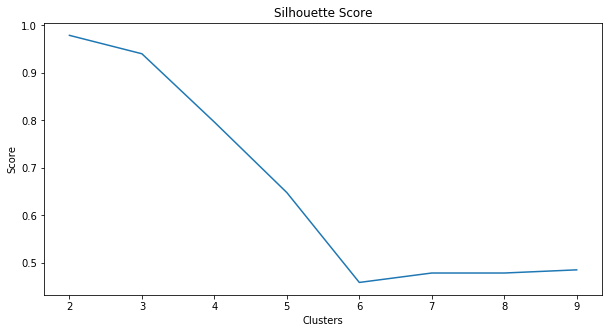

In [120]:
error = {}
for i in range(2,10):
    model = KMeans(n_clusters=i,random_state=42)
    model.fit(rfm_df)
    error[i] = silhouette_score(rfm_df, model.labels_,metric='euclidean')

plt.figure(figsize=(10,5))
plt.title("Silhouette Score")
plt.plot(list(error.keys()),list(error.values()))
plt.xlabel("Clusters")
plt.ylabel("Score")
plt.show()

In [43]:
kmeans = KMeans(n_clusters=3,random_state=42)
kmeans.fit(rfm_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [44]:
rfm_df['cluster'] = kmeans.labels_
rfm_df.head()

,CustomerID,recency,frequency,monetary,cluster
0,12346.0,325,2,0.00,0
1,12347.0,1,182,4310.00,0
2,12348.0,74,31,1797.24,0
3,12349.0,18,73,1757.55,0
4,12350.0,309,17,334.40,0


In [89]:
from mpl_toolkits.mplot3d import Axes3D

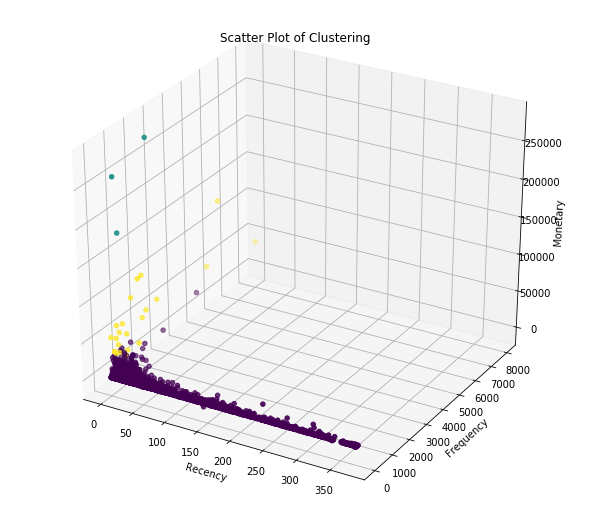

In [124]:
fig = plt.figure(figsize=(8,7))
ax = Axes3D(fig)
plt.title("Scatter Plot of Clustering")
ax.scatter(rfm_df['recency'],rfm_df['frequency'],rfm_df['monetary'],c=kmeans.labels_)
ax.set_xlabel("Recency",size=10)
ax.set_ylabel("Frequency",size=10)
ax.set_zlabel("Monetary",size=10)
plt.show()

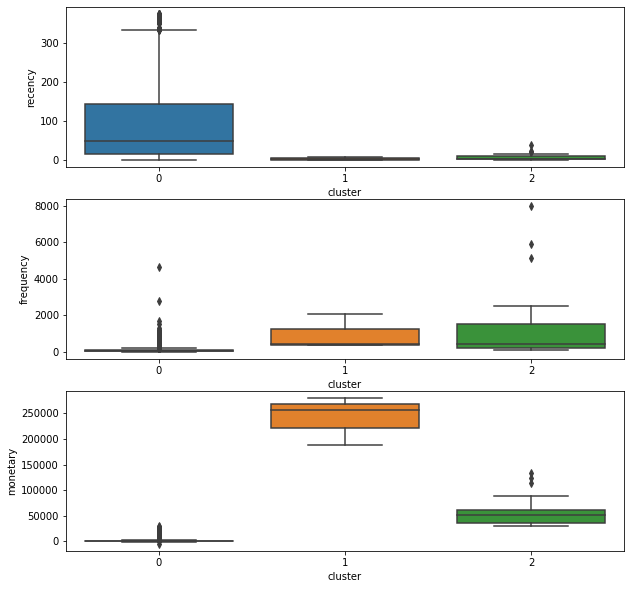

In [45]:
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
sns.boxplot(rfm_df.cluster,rfm_df.recency)
plt.subplot(3,1,2)
sns.boxplot(rfm_df.cluster,rfm_df.frequency)
plt.subplot(3,1,3)
sns.boxplot(rfm_df.cluster,rfm_df.monetary)
plt.show()

Cluster 0  = Silver Customers (less frequent and less revenue generator) 

Cluster 1  = Platinum Customers (frequent and more revenue generator)

Cluster 2  = Gold Customers (frequent but less revenue generator)

In [46]:
rfm_df.head()

,CustomerID,recency,frequency,monetary,cluster
0,12346.0,325,2,0.00,0
1,12347.0,1,182,4310.00,0
2,12348.0,74,31,1797.24,0
3,12349.0,18,73,1757.55,0
4,12350.0,309,17,334.40,0


Augment! Score of each customer!

In [47]:
rfm_df[rfm_df.cluster==1] #Platinum Customers

,CustomerID,recency,frequency,monetary,cluster
1703,14646.0,1,2085,279489.02,1
3758,17450.0,7,351,187482.17,1
4233,18102.0,0,433,256438.49,1


Calculating the Score based on quartiles

In [48]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [49]:
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [50]:
customer_df = rfm_df.copy()
customer_df.head()

,CustomerID,recency,frequency,monetary,cluster
0,12346.0,325,2,0.00,0
1,12347.0,1,182,4310.00,0
2,12348.0,74,31,1797.24,0
3,12349.0,18,73,1757.55,0
4,12350.0,309,17,334.40,0


In [51]:
customer_df['r_quartile'] = customer_df['recency'].apply(RScore, args=('recency',quantiles,))
customer_df['f_quartile'] = customer_df['frequency'].apply(FMScore, args=('frequency',quantiles,))
customer_df['m_quartile'] = customer_df['monetary'].apply(FMScore, args=('monetary',quantiles,))
customer_df.head()

,CustomerID,recency,frequency,monetary,cluster,r_quartile,f_quartile,m_quartile
0,12346.0,325,2,0.00,0,4,4,4
1,12347.0,1,182,4310.00,0,1,1,1
2,12348.0,74,31,1797.24,0,3,3,1
3,12349.0,18,73,1757.55,0,2,2,1
4,12350.0,309,17,334.40,0,4,4,3


In [52]:
customer_df['RFMScore'] = customer_df.r_quartile.map(str) + customer_df.f_quartile.map(str) + customer_df.m_quartile.map(str)
customer_df.head()

,CustomerID,recency,frequency,monetary,cluster,r_quartile,f_quartile,m_quartile,RFMScore
0,12346.0,325,2,0.00,0,4,4,4,444
1,12347.0,1,182,4310.00,0,1,1,1,111
2,12348.0,74,31,1797.24,0,3,3,1,331
3,12349.0,18,73,1757.55,0,2,2,1,221
4,12350.0,309,17,334.40,0,4,4,3,443


In [53]:
customer_df['totalScore'] = customer_df['r_quartile'] + customer_df['f_quartile'] + customer_df['m_quartile']
customer_df.head()

,CustomerID,recency,frequency,monetary,cluster,r_quartile,f_quartile,m_quartile,RFMScore,totalScore
0,12346.0,325,2,0.00,0,4,4,4,444,12
1,12347.0,1,182,4310.00,0,1,1,1,111,3
2,12348.0,74,31,1797.24,0,3,3,1,331,7
3,12349.0,18,73,1757.55,0,2,2,1,221,5
4,12350.0,309,17,334.40,0,4,4,3,443,11


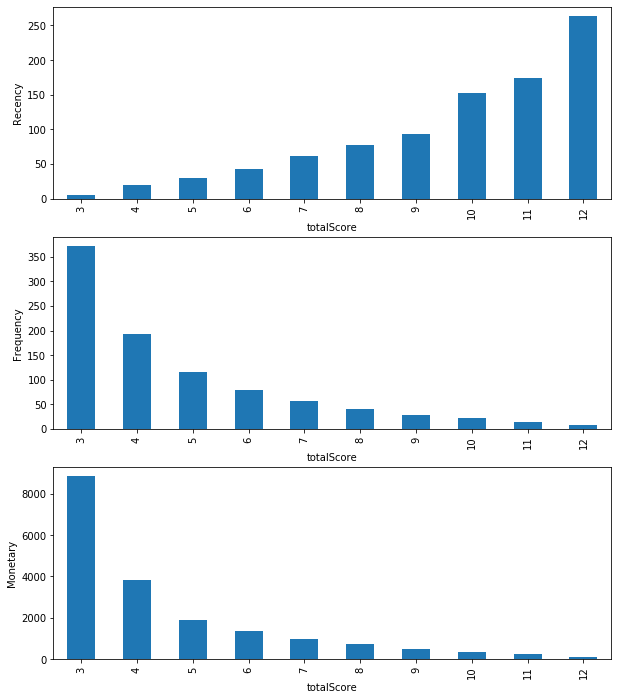

In [54]:
plt.figure(figsize=(10,12))
plt.subplot(3,1,1)
plt.ylabel("Recency")
customer_df.groupby(customer_df.totalScore).mean()['recency'].plot(kind='bar')
plt.subplot(3,1,2)
plt.ylabel("Frequency")
customer_df.groupby(customer_df.totalScore).mean()['frequency'].plot(kind='bar')
plt.subplot(3,1,3)
plt.ylabel("Monetary")
customer_df.groupby(customer_df.totalScore).mean()['monetary'].plot(kind='bar')
plt.show()

Best Customers = Customers with total score closer to 3 or RFM score close to 111

In [55]:
customer_df[customer_df.cluster==1] #Platinum Customers

,CustomerID,recency,frequency,monetary,cluster,r_quartile,f_quartile,m_quartile,RFMScore,totalScore
1703,14646.0,1,2085,279489.02,1,1,1,1,111,3
3758,17450.0,7,351,187482.17,1,1,1,1,111,3
4233,18102.0,0,433,256438.49,1,1,1,1,111,3


In [56]:
def rfm_level(df):
    if df['totalScore'] >= 9:
        return 'Require Activation'
    elif ((df['totalScore'] >= 8) and (df['totalScore'] < 9)):
        return 'Needs Attention'
    elif ((df['totalScore'] >= 7) and (df['totalScore'] < 8)):
        return 'Promising'
    elif ((df['totalScore'] >= 6) and (df['totalScore'] < 7)):
        return 'Potential'
    elif ((df['totalScore'] >= 4) and (df['totalScore'] < 6)):
        return 'Champions'
    else:
        return 'Can\'t Loose Them'

customer_df['RFMLevel'] = customer_df.apply(rfm_level, axis=1)
customer_df.head()

,CustomerID,recency,frequency,monetary,cluster,r_quartile,f_quartile,m_quartile,RFMScore,totalScore,RFMLevel
0,12346.0,325,2,0.00,0,4,4,4,444,12,Require Activation
1,12347.0,1,182,4310.00,0,1,1,1,111,3,Can't Loose Them
2,12348.0,74,31,1797.24,0,3,3,1,331,7,Promising
3,12349.0,18,73,1757.55,0,2,2,1,221,5,Champions
4,12350.0,309,17,334.40,0,4,4,3,443,11,Require Activation


In [57]:
rfm_level_agg = customer_df.groupby('RFMLevel').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': ['mean', 'count']
}).round(2)
print(rfm_level_agg)

                   recency frequency monetary      
                      mean      mean     mean count
RFMLevel                                           
Can't Loose Them      5.69    371.83  8850.73   471
Champions            25.37    151.08  2782.93   808
Needs Attention      77.81     39.67   724.17   447
Potential            43.23     79.03  1369.56   411
Promising            61.74     57.00   974.72   467
Require Activation  166.00     18.55   305.98  1768
